<a href="https://colab.research.google.com/github/ritwiks9635/My_priject_file_5/blob/main/Flower%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing modules
2.Importing Dataset
3.Image Data Generator
4.Model Development 
5.Model Evaluation and Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT MODULE

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob 
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

Import dataset

In [ ]:
data_dir = "/content/drive/MyDrive/flowers"

batch_size = 64

In [ ]:
classes = os.listdir(data_dir)
classes

['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']

Image Data Generator

In [ ]:
train_gen = ImageDataGenerator(rescale  = 1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip = True, validation_split=0.2)
val_gen = ImageDataGenerator(rescale  = 1./255,validation_split=0.2)

In [ ]:
train_gen = train_gen.flow_from_directory(
  data_dir,
  target_size=(224,224),
  subset="training",
  batch_size = batch_size)
val_gen = val_gen.flow_from_directory(
  data_dir,
  target_size=(224,224),
  subset="validation",
  batch_size = batch_size)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


show image

In [ ]:
x, y = next(train_gen)
x.shape

(64, 224, 224, 3)

In [ ]:
a = train_gen.class_indices
class_name = list(a.keys())
def plot_img(image, labels):
  plt.figure(figsize=(15,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(class_name[np.argmax(labels[i])])
    plt.axis("off")

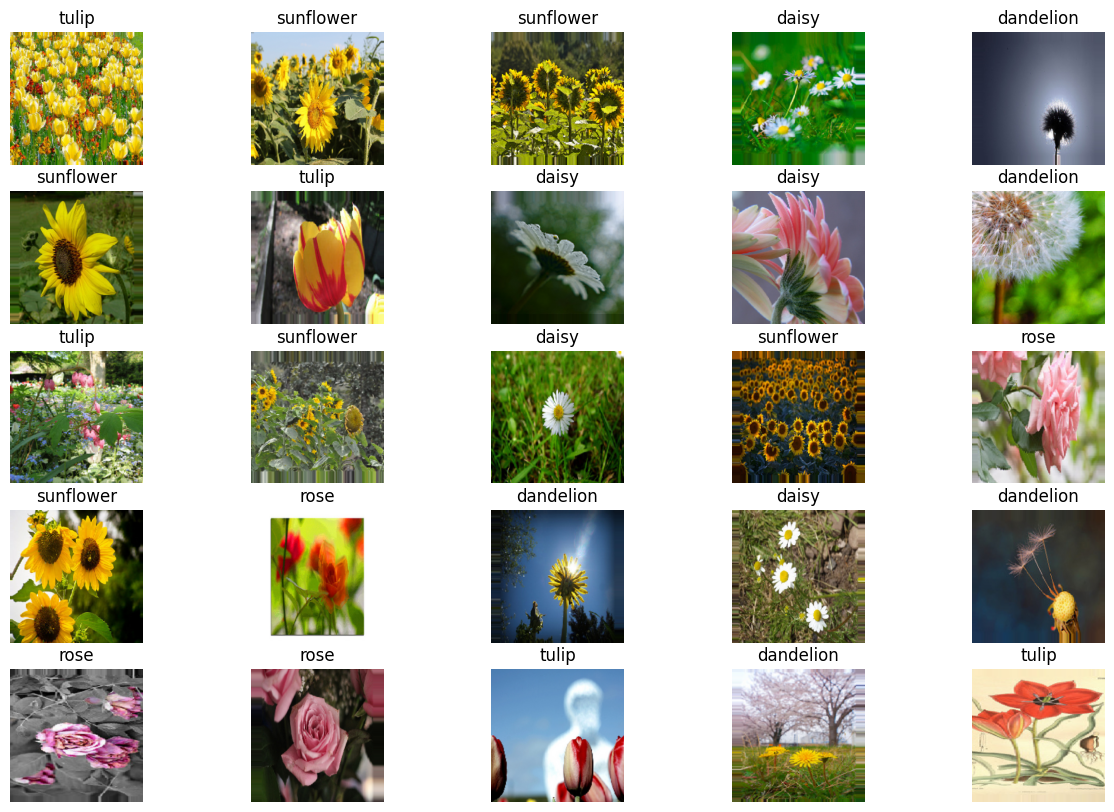

In [ ]:
plot_img(x, y)

Model Development

In [ ]:

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

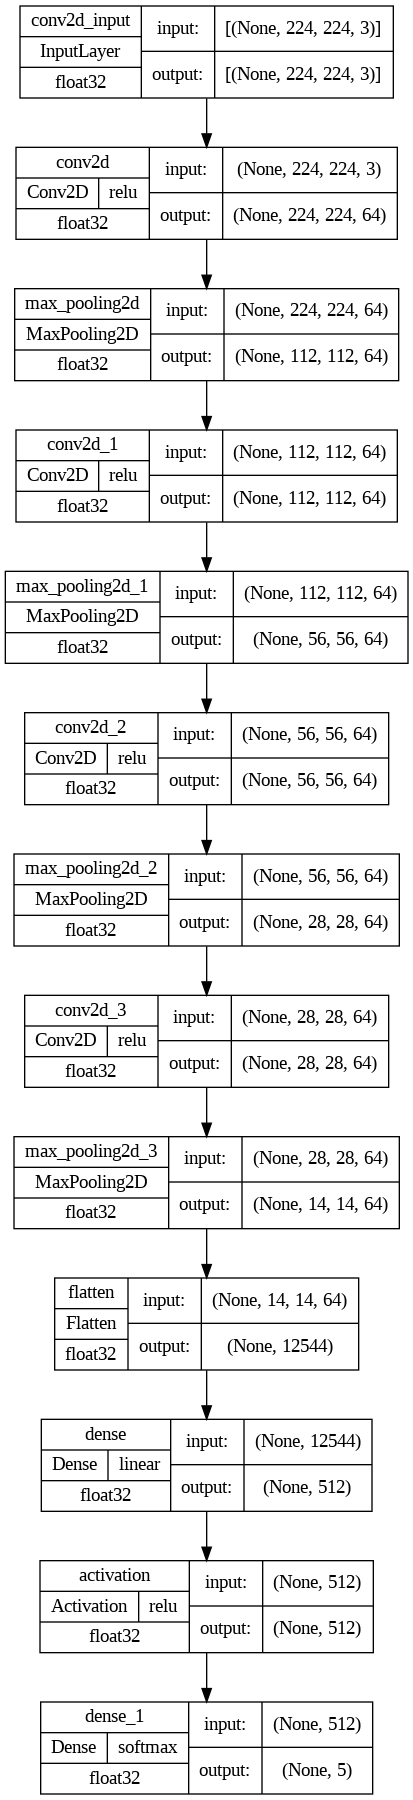

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True,  show_dtype = True, show_layer_activations = True)

Fit model

In [ ]:
model.fit(train_gen, validation_data = val_gen, epochs = 30)

Epoch 1/30
55/55 [==============================] - 2823s 51s/step - loss: 1.3366 - accuracy: 0.4165 - val_loss: 1.2568 - val_accuracy: 0.4651
Epoch 2/30
55/55 [==============================] - 60s 1s/step - loss: 1.1247 - accuracy: 0.5363 - val_loss: 1.1099 - val_accuracy: 0.5756
Epoch 3/30
55/55 [==============================] - 60s 1s/step - loss: 1.0741 - accuracy: 0.5797 - val_loss: 1.0058 - val_accuracy: 0.6081
Epoch 4/30
55/55 [==============================] - 61s 1s/step - loss: 0.9375 - accuracy: 0.6355 - val_loss: 0.9127 - val_accuracy: 0.6558
Epoch 5/30
55/55 [==============================] - 60s 1s/step - loss: 0.9088 - accuracy: 0.6436 - val_loss: 0.9430 - val_accuracy: 0.6279
Epoch 6/30
55/55 [==============================] - 59s 1s/step - loss: 0.8140 - accuracy: 0.6873 - val_loss: 0.9351 - val_accuracy: 0.6291
Epoch 7/30
55/55 [==============================] - 66s 1s/step - loss: 0.7722 - accuracy: 0.7015 - val_loss: 0.9047 - val_accuracy: 0.6616
Epoch 8/30
55/55 

Saving and Loading model

In [ ]:
from tensorflow.keras.models import load_model
model.save("flower_model.h2")

load_model = load_model("flower_model.h2")

Model Evaluation and Prediction

In [ ]:
train_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 187ms/step
[[0. 0. 0. 1. 0.]]
sunflower


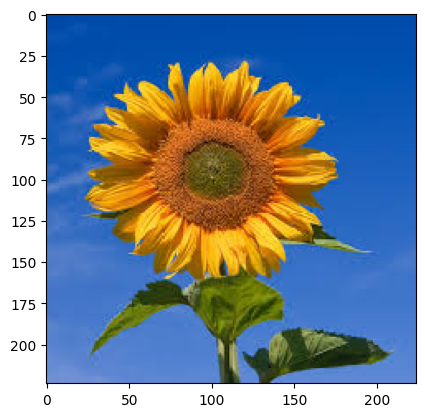

In [ ]:
#from keras.utils import load_img
#from keras.preprocessing.image import load_img
list_ = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']
test = tf.keras.utils.load_img("/content/download.jpeg", target_size=(224,224))
plt.imshow(test)
test_image = tf.keras.utils.img_to_array(test)
test_image = np.expand_dims(test_image, axis = 0)

result = load_model.predict(test_image)
print(result)
i = 0
for i in range(len(result[0])):
  if(result[0][i] == 1):
    print(list_[i])
    break

1/1 [==============================] - 0s 95ms/step
[[0. 0. 0. 0. 1.]]
tulip


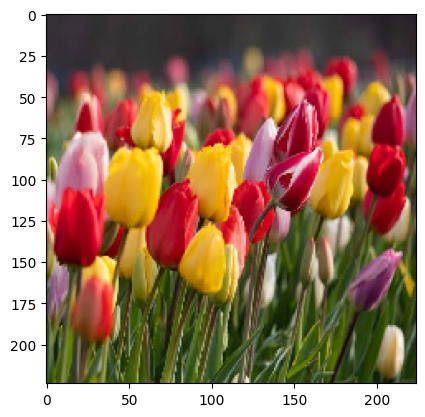

In [ ]:
#from keras.utils import load_img
#from keras.preprocessing.image import load_img
list_ = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']
test = tf.keras.utils.load_img("/content/images (11).jpeg", target_size=(224,224))
plt.imshow(test)
test_image = tf.keras.utils.img_to_array(test)
test_image = np.expand_dims(test_image, axis = 0)

result = load_model.predict(test_image)
print(result)
i = 0
for i in range(len(result[0])):
  if(result[0][i] == 1):
    print(list_[i])
    break